In [2]:
from io import StringIO
import pandas as pd

from src.score_analyzer import score_analyzer


In [3]:
# raw data with expected results
RAW_TEST_DATA = '''score_1,score_2,expected_highlighted,expected_risk_1_group
0.71,0.4,False,High
0.52,0.85,False,High
0.18,0.7,True,Medium
0.11,0.55,True,Medium
0.74,0.08,False,High
0.9,0.34,False,Very High
0.96,0.17,False,Very High
0.59,0.14,False,High
0.56,0.03,False,High
0.05,0.62,True,Very Low
0.19,0.08,True,Medium'''


In [4]:
def generate_raw_data():
    '''              
    Create tempfile (csv) for opening with read_csv, and then use as fixture
                     
    Returns:         
    --------
    df: dataframe, with score_1 and score_2 inputs, and associated expected
        result fields/values

    '''
    with StringIO(RAW_TEST_DATA) as temp:
        df = pd.read_csv(temp, dtype=str)
        df['score_1'] = df['score_1'].astype(float)
        df['score_2'] = df['score_2'].astype(float)
        df.loc[df['expected_highlighted'] == 'True', 'expected_highlighted'] = True
        df.loc[df['expected_highlighted'] == 'False', 'expected_highlighted'] = False
        return df

In [5]:
test_df = generate_raw_data()

In [6]:
test_df.head()

,score_1,score_2,expected_highlighted,expected_risk_1_group
0,0.71,0.40,False,High
1,0.52,0.85,False,High
2,0.18,0.70,True,Medium
3,0.11,0.55,True,Medium
4,0.74,0.08,False,High


<Axes: >

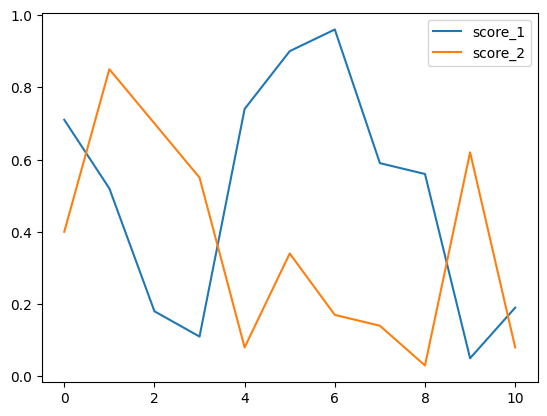

In [7]:
test_df.plot()

array([<Axes: >], dtype=object)

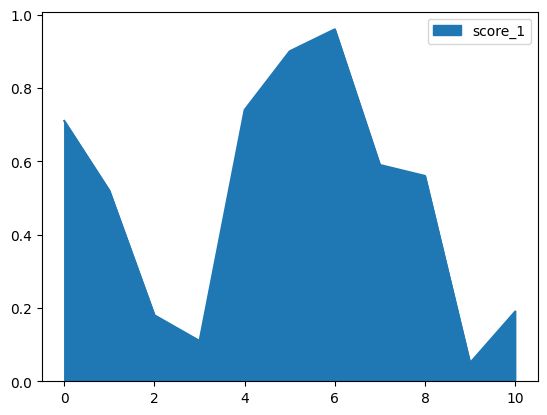

In [8]:
test_df[['score_1','expected_risk_1_group']].plot.area(subplots=True)

In [9]:
results = score_analyzer(test_df)


In [10]:
results.head()

,score_1,score_2,expected_highlighted,expected_risk_1_group,highlighted,risk_1_group,High,Medium,Very High,Very Low
0,0.71,0.40,False,High,False,High,0.71,NaN,NaN,NaN
1,0.52,0.85,False,High,False,High,0.52,NaN,NaN,NaN
2,0.18,0.70,True,Medium,True,Medium,NaN,0.18,NaN,NaN
3,0.11,0.55,True,Medium,True,Medium,NaN,0.11,NaN,NaN
4,0.74,0.08,False,High,False,High,0.74,NaN,NaN,NaN


In [11]:
df = results[['Very Low', 'score_1']]

<Axes: >

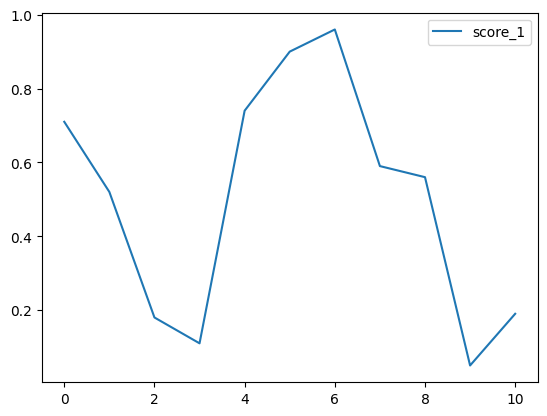

In [16]:
df.plot()

In [17]:
df.head()

,risk_1_group,score_1
0,High,0.71
1,High,0.52
2,Medium,0.18
3,Medium,0.11
4,High,0.74


In [21]:
df = df.reset_index()

In [22]:
df.head()

,score_1,risk_1_group
0,0.71,High
1,0.52,High
2,0.18,Medium
3,0.11,Medium
4,0.74,High


In [23]:
df = df.set_index('risk_1_group')

In [24]:
df.head()

,score_1
risk_1_group,
High,0.71
High,0.52
Medium,0.18
Medium,0.11
High,0.74


<Axes: xlabel='risk_1_group'>

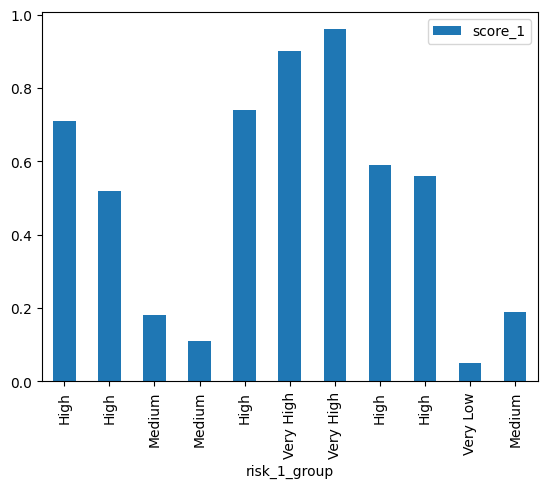

In [26]:
df.plot.bar()

this dataframe would be nice to have column names by the risk_1_group names so they can be plotted against one another